# Create custum colormaps
## using HCl colorspace for perceptual uniform cmaps

In [3]:
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap


import spectra
from colorspacious import cspace_converter

! pip install git+https://github.com/retostauffer/python-colorspace
import colorspace
from colorspace import sequential_hcl

projectpath = 'C:/Users/david/OneDrive - uibk.ac.at/MA/VU Elective Vizualisation of scientific data/lecture material/jupyter notebooks'


  Cloning https://github.com/retostauffer/python-colorspace to c:\users\david\appdata\local\temp\pip-req-build-ny_6xwsr
  Resolved https://github.com/retostauffer/python-colorspace to commit f823acded12f74c16095daa7c0a33907ee63f62c
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for colorspace: filename=colorspace-0.1.0-py3-none-any.whl size=142205 sha256=e004714e6d4b015104c3bde75841de6c99b0e837e33f23ad886a5296b1986240
  Stored in directory: C:\Users\david\AppData\Local\Temp\pip-ephem-wheel-cache-bn8mlg_5\wheels\eb\94\fc\81433ab18bdf1f476d877d2ed7c4d51e20b65f9b5cf82f8795
Successfully built colorspace


  Running command git clone --filter=blob:none --quiet https://github.com/retostauffer/python-colorspace 'C:\Users\david\AppData\Local\Temp\pip-req-build-ny_6xwsr'


In [4]:
fc='.8'
plt.rcParams['axes.facecolor'] = '1'
plt.rcParams['axes.edgecolor'] = fc
plt.rcParams['axes.linewidth'] = .5

plt.rcParams['axes.labelcolor'] = fc
plt.rcParams['grid.color'] = '.8'
plt.rcParams['grid.linewidth'] = .5

plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0


fs=10


# Colorspace converting tools  

In [5]:
rgb=(.4,.5,.6)

In [6]:
# cspace_converter
cspace_converter("sRGB1", "CIELab")(rgb)

array([ 52.32228468,  -2.74179594, -16.66134743])

In [7]:
cspace_converter("sRGB1", "CIELCh")(rgb)

array([ 52.32228468,  16.88543583, 260.65514321])

In [8]:
#spectra
r,g,b=rgb[0],rgb[1],rgb[2]
spectra.rgb(r,g,b).to("lch").values

(52.322495417496086, 16.884376335202916, 260.6402704903056)

In [9]:
spectra.rgb(r,g,b).to("lab").values

(52.322495417496086, -2.745948454240754, -16.65958977032187)

In [10]:
#back and forth transformation not 100%
cs = spectra.lch(90,100,50).rgb
spectra.rgb(cs[0],cs[1],cs[2]).to("lch").values

(89.03186051746415, 97.07082990089054, 50.71510362502785)

In [11]:
def plot_cmap(cmap):
    '''
    '''
    ax = plt.figure(figsize=[10,10]).add_axes([0,0,1,1])

    p1 = ax.imshow(np.array([[1,1],[2,2]]),cmap=cmap,alpha=1)
    cb = plt.colorbar(p1,orientation='horizontal')
    cb.set_ticks([])
    ax.set_visible(False)
    
    return ax

def gamut(c_tup):
    
    if any([c>1 for c in c_tup]):
        c_tup2=(0.95,0.95,.95)
    else:
        c_tup2=c_tup
    return tuple(c_tup2)


def cmap_hcl(hs,cs,ls):
    
    cmap = ListedColormap([gamut(spectra.lch(i,j,k).rgb) for 
                     (i,j,k) in zip(ls,cs,hs)])
    return cmap

# Custom cmaps
## define arrays of hues (hs), chromas (cs) and luminances (ls)

(0.0, 100.0)

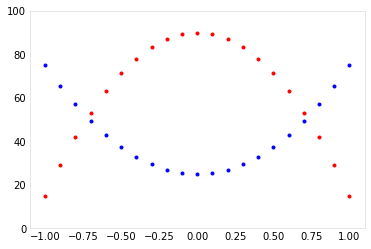

In [12]:
n = 21
x = np.linspace(-1,1,n)

ls = 75*(1-x**2)+15
cs = 50*(x**2)+25

plt.plot(x,ls,'r.')
plt.plot(x,cs,'b.')
plt.ylim(0,100)

<Axes:>

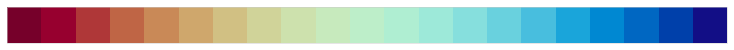

In [13]:
hs = np.linspace(0,300,n)

cmap_rb_div1 = cmap_hcl(hs,cs,ls)
plot_cmap(cmap_rb_div1)
#plt.savefig(projectpath+'cmap_rb_div1.pdf',bbox_inches='tight',dpi=300)

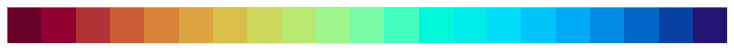

In [14]:
hs = np.linspace(0,300,n)
cs = 60*np.ones(n)

cmap_rb1 = cmap_hcl(hs,cs,ls)
plot_cmap(cmap_rb1);

(0.0, 100.0)

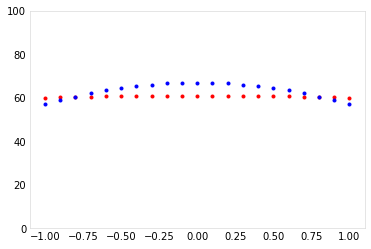

In [15]:
n = 21
x = np.linspace(-1,1,n)

ls = 1*(1-x**2)+60
cs = 10*(1-x**2)+57

plt.plot(x,ls,'r.')
plt.plot(x,cs,'b.')
plt.ylim(0,100)

<Axes:>

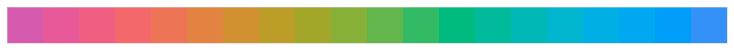

In [16]:
n = 20
cmap_rb_flat = cmap_hcl(np.linspace(-20,270,n),ls,cs)
plot_cmap(cmap_rb_flat)
#plt.savefig(projectpath+'cmap_rb_flat2.pdf',bbox_inches='tight',dpi=300)

<Axes:>

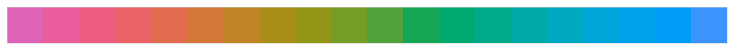

In [17]:
n = 20
cmap_rb_flat = cmap_hcl(np.linspace(-20,270,n),60*np.ones(n),60*np.ones(n))
plot_cmap(cmap_rb_flat)
#plt.savefig(projectpath+'cmap_rb_flat.pdf',bbox_inches='tight',dpi=300)

<Axes:>

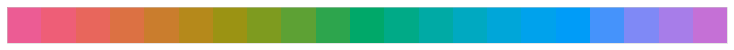

In [18]:
n = 21
cmap_rb_cyc = cmap_hcl(np.linspace(0,320,n),60*np.ones(n),60*np.ones(n))
plot_cmap(cmap_rb_cyc)
#plt.savefig(projectpath+'cmap_rb_cyc.pdf',bbox_inches='tight',dpi=300)

(0.0, 100.0)

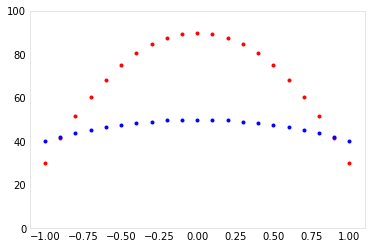

In [19]:
n = 21
x = np.linspace(-1,1,n)

ls = 60*(1-x**2)+30
cs = 10*(1-x**2)+40

plt.plot(x,ls,'r.')
plt.plot(x,cs,'b.')
plt.ylim(0,100)

<Axes:>

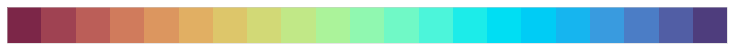

In [20]:
cmap_rb_div2 = cmap_hcl(np.linspace(0,300,n),cs,ls)
plot_cmap(cmap_rb_div2)
#plt.savefig(projectpath+'cmap_rb_div2.pdf',bbox_inches='tight',dpi=300)

(0.0, 100.0)

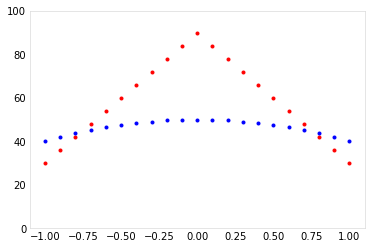

In [21]:
n = 21
x = np.linspace(-1,1,n)

ls = 60*(1-abs(x))+30
cs=10*(1-x**2)+40

plt.plot(x,ls,'r.')
plt.plot(x,cs,'b.')
plt.ylim(0,100)

<Axes:>

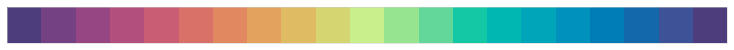

In [22]:
cmap_rb_div3 = cmap_hcl(np.linspace(-60,300,n),cs,ls)
plot_cmap(cmap_rb_div3)
#plt.savefig(projectpath+'cmap_rb_div3.pdf',bbox_inches='tight',dpi=300)

(0.0, 100.0)

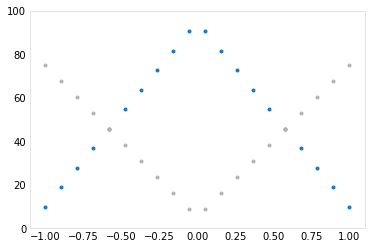

In [23]:
n=20
x=np.linspace(-1,1,n)
ls=85*(1-abs(x))+10
cs=70*(abs(x))+5

plt.plot(x,ls,'.')
plt.plot(x,cs,'.',c='.7')

plt.ylim(0,100)

In [24]:
n = 20
hs = list(20*np.ones(int(n/2)))+list(230*np.ones(int(n/2)))

<Axes:>

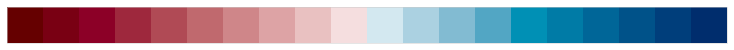

In [25]:
cmap_div1 = cmap_hcl(hs,cs,ls)
plot_cmap(cmap_div1)

(0.0, 100.0)

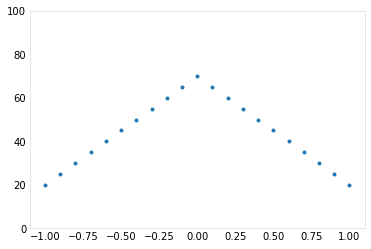

In [26]:
n=21
x=np.linspace(-1,1,n)
ls=50*(1-abs(x))+20

plt.plot(x,ls,'.')
plt.ylim(0,100)

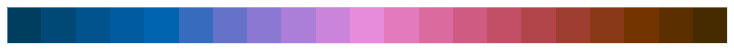

In [27]:
cmap_div2 = cmap_hcl(np.linspace(220,440,n),50*np.ones(n),ls)
plot_cmap(cmap_div2);

<Axes:>

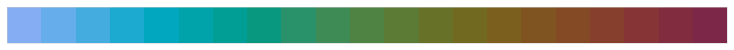

In [28]:
cmap = cmap_hcl(np.linspace(270,0,n),np.linspace(40,40,n),np.linspace(70,30,n))
plot_cmap(cmap)

<Axes:>

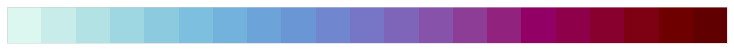

In [29]:
cmap_seq1 = cmap_hcl(np.linspace(180,400,n),np.linspace(10,80,n),np.linspace(95,10,n))
plot_cmap(cmap_seq1)

# plot HCL space

In [30]:
fs=10 #fontsize

def cmap2hcl(cmap,n):
    '''
    convert a mpl cmap to hcl coords
    '''
    n = cmap.N
    cmap_l = [cmap(k) for k in range(n)]
    lchs = [spectra.rgb(c[0],c[1],c[2]).to("lch").values for c in cmap_l]
    hs = np.array(lchs).T[2]
    cs = np.array(lchs).T[1]
    ls = np.array(lchs).T[0]
    
    return ls,cs,hs


def cmap_legend(ax,cmap):
    '''
    plot a cmap colorbar
    '''
    p1 = ax.imshow(np.array([[1,1],[2,2]]),cmap=cmap,alpha=1)
    cb = plt.colorbar(p1,orientation='horizontal')
    cb.set_ticks([])
    ax.set_visible(False)
    
    return ax

def cmap_togray(cmap_l):
    '''
    convert to gry scale
    '''
    cmap_l_gray=[]
    for c in cmap_l:
        c2=np.dot([c[0],c[1],c[2]], [0.299, 0.587, 0.114])
        cmap_l_gray.append([c2,c2,c2])

    return cmap_l_gray


def format_axes_hcl(ax,n,ylim,ylabel):
    
    ax.set_xticks(range(n))
    ax.set_xticklabels('')
    ax.set_xlim(-.5,n-.5)
    ax.set_yticks([0,100])
    ax.set_yticklabels('')
    ax.set_ylim(0,ylim)
    ax.grid(False)
    #ax.annotate(ylabel, xy=(-.3,.5), ha='right', va='center',
    #                xycoords='axes fraction',fontsize=12,color='.2')
    ax.annotate(ylabel, xy=(-.051,1), ha='right', va='top',
                    xycoords='axes fraction',fontsize=12,color='.2')


def plot_hcl_mult(xoffs,yoffs,cmap,name):
    
    n = cmap.N
    cmap_l=[cmap(k) for k in range(n)]
    ls,cs,hs = cmap2hcl(cmap,n)
    x=range(n)
    w=.5
    h=.15
    dh=.02

    ax1=plt.axes([xoffs,2*(h+dh)+h+.01,w,w])
    cmap_legend(ax1,cmap)    

    ax2=plt.axes([xoffs,2*(h+dh)+h-.03,w,w])
    cmap_legend(ax2,ListedColormap(cmap_togray(cmap_l)))   

    ax3=plt.axes([xoffs,2*(h+dh),w,h])
    ax3.plot(x,ls,'.-',color='.2',lw=.5)
    format_axes_hcl(ax3,n,100,'l')


    ax=plt.axes([xoffs,(h+dh),w,h])
    ax.plot(x,cs,'.-',color='.2',lw=.5)
    format_axes_hcl(ax,n,100,'c')

    ax=plt.axes([xoffs,0,w,h])
    ax.plot(x,hs,'.-',color='.2',lw=.5)
    format_axes_hcl(ax,n,360,'h')
    
    ax3.annotate(name, xy=(0,1.6), ha='left', va='bottom',
                    xycoords='axes fraction',fontsize=fs,color='.2')

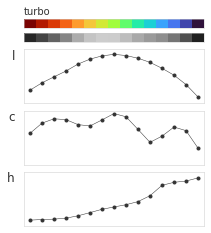

In [31]:
n = 15
plt.figure(figsize=[5,5])
plot_hcl_mult(0,0,plt.get_cmap('turbo_r',n),'turbo')

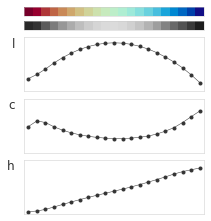

In [32]:
plt.figure(figsize=[5,5])
plot_hcl_mult(0,0,cmap_rb_div1,'')


# Using seaborn's cubehelix

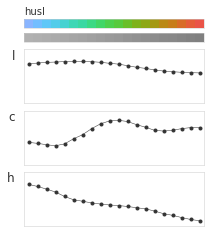

In [33]:
import seaborn as sns

cmap_l=sns.cubehelix_palette(20, start=-.7, rot=3.1,hue=2,light=.5,dark=.7,as_cmap=False)[::-1]
cmap=ListedColormap(cmap_l)

plt.figure(figsize=[5,5])
plot_hcl_mult(0,0,cmap,'husl')

# Using Reto's colorspace

In [34]:
n=15

hex = sequential_hcl(h = [-220,20], c = [0, 90, 0], l = [95, 10], power = [1.5,1.5])(n)

<Axes:>

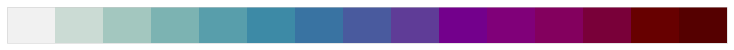

In [35]:
cmap = ListedColormap(hex)
plot_cmap(cmap)

<Axes:>

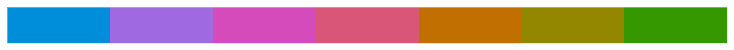

In [36]:
n = 7
cmap = ListedColormap(sequential_hcl(h = [-120,120], c = [90], l = [55], power = [1.5])(n))
plot_cmap(cmap)

In [37]:
cmap(0),cmap(3),cmap(6)

((0.0, 0.5568627450980392, 0.8588235294117647, 1.0),
 (0.8549019607843137, 0.33725490196078434, 0.47058823529411764, 1.0),
 (0.20784313725490197, 0.596078431372549, 0.0, 1.0))

In [38]:
#sequential_hcl?

# from list

In [39]:
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]


<Axes:>

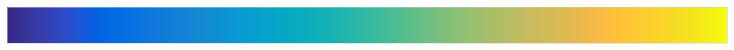

In [40]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
cmap_p = parula_map

plot_cmap(cmap_p)
#plt.savefig(projectpath+'cmap_parula.png',bbox_inches='tight',dpi=300)

<Axes:>

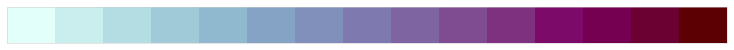

In [41]:
cmap_l = ("#5D0004","#6B0033","#750051","#7B0A69","#7E317F","#7F4C91","#7E64A1","#7E7AAF","#8090BB","#85A4C5","#90B8CE","#A0CAD8","#B3DDE2","#CAEEED","#E3FFFA")
cmap = ListedColormap(cmap_l[::-1])
plot_cmap(cmap)

<Axes:>

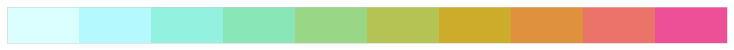

In [42]:
cmap=ListedColormap(["#DBFFFF","#B3F9FE","#92F1DF","#89E6B6","#99D786","#B4C353","#CDAC2B","#E0913D","#EB736A","#ED5096"])
cmap.set_bad((.22,.22,.27))
plot_cmap(cmap)

<Axes:>

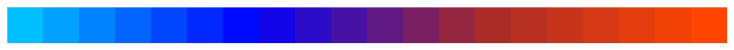

In [43]:
cmap = LinearSegmentedColormap.from_list('mycmap', ['deepskyblue','blue','brown' ,'orangered'],20)
plot_cmap(cmap)

# 2D cmaps

In [44]:
def twod_cmap(p):
    Nx=20
    Ny=20
    c_xmin='dodgerblue'
    c_xmax='orangered'
    #c_xmax='red'

    #c_ymin='lightgreen'
    c_ymin='cyan'
    #c_ymax='yellow'
    c_ymax='deeppink'
    #c_ymax='rose'

    

    cmap1 = LinearSegmentedColormap.from_list('mycmap', [c_xmin,c_xmax],Nx)
    cmap2 = LinearSegmentedColormap.from_list('mycmap', [c_xmin,c_ymin],Ny)
    cmap3 = LinearSegmentedColormap.from_list('mycmap', [c_xmax,c_ymax],Ny)
    cmap4 = LinearSegmentedColormap.from_list('mycmap', [c_ymin,c_ymax],Nx)

    if p:
        ax=plt.axes([0,0,.7,.7])
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        for j in range(Nx):
            for i in range(Ny):
                cmap_i=LinearSegmentedColormap.from_list('mycmap', [cmap2(j),cmap3(j)],Ny)
                ax.plot(i,j,'s',c=cmap_i(i),ms=20)
                ax.plot(i,0,'s',c=cmap1(i),ms=20)
                ax.plot(0,i,'s',c=cmap2(i),ms=20)
                ax.plot(Nx,i,'s',c=cmap3(i),ms=20)
                ax.plot(i,Ny,'s',c=cmap4(i),ms=20)
                #plt.plot(i,20,'s',c=cmap_i(i),ms=20)
    
    cmap=[]
    for j in range(Nx):
        cmap_i=LinearSegmentedColormap.from_list('mycmap', [cmap2(j),cmap3(j)],Ny)
        for k in range(Ny):
            cmap.append(cmap_i(k))
    
    cmap_f = ListedColormap(cmap, name='my_name')
            
    return cmap_f

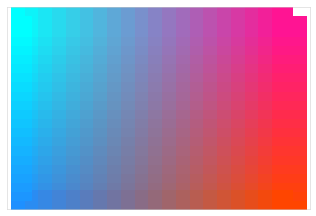

In [45]:
cmap_2d = twod_cmap(True)

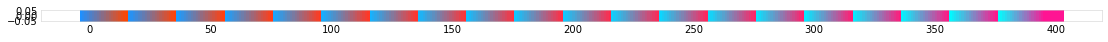

In [46]:
plt.figure(figsize=[19,.2])
for i in range(400):
    plt.plot(i,0,'s',c=cmap_2d(i),ms=20)